# Background

##What does the banking industry in Kenya look like?
The financial industry is regulated by the Central Bank of Kenya. In their [2017 Bank supervision report](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&cad=rja&uact=8&ved=2ahUKEwiiy73ixe3hAhWrx4UKHa2MAi4QFjABegQIARAC&url=https%3A%2F%2Fwww.centralbank.go.ke%2Fuploads%2Fbanking_sector_annual_reports%2F873911276_2017%2520Annual%2520Report.pdf&usg=AOvVaw0wCDQxBN88WJjeo-Q_Mt5O), the banking sector comprised of 8 large, 11 medium and 21 small banks having a combined weighted market share as follows:






In [1]:
#We import the necessary packages for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.probability import FreqDist

#I also decided to import pycodestyle to ensure that my work is following
# PEP 8 conventions
!pip install pycodestyle flake8 pycodestyle_magic
%load_ext pycodestyle_magic

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 51kB 3.5MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 61kB 24.1MB/s 


Large banks have a composite index of 5%+
Medium banks have a composite index of 1-5%
Small banks have a composite index of <1%
 


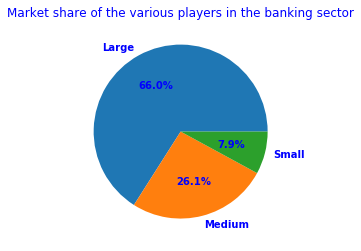

In [2]:
# %%pycodestyle

# Banking sector figures were as follows as at December 2017:

# 1. We need to build a table with our percentages
# This was done by making a list and converting it to a dataframe
print('Large banks have a composite index of 5%+')
print('Medium banks have a composite index of 1-5%')
print('Small banks have a composite index of <1%')
print(' ')
Viz1 = [['Large', 0.6598], ['Medium', 0.261], ['Small', 0.0792]]
Viz1 = pd.DataFrame(Viz1)
Viz1.columns = ['Type', '%']

# 2. We need to visualize our data. I chose a pie chart.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["text.color"] = "blue"

plt.title('Market share of the various players in the banking sector')
plt.pie(Viz1['%'], labels=Viz1['Type'], autopct='%.1f%%')
plt.show()

From the findings above, it is clear that large banks, though few, dominate the Kenyan market. The report then goes on to show the market leaders in the large banks category: KCB Bank Kenya Ltd., Co-operative Bank of Kenya Ltd. and Equity Bank Kenya Ltd.  

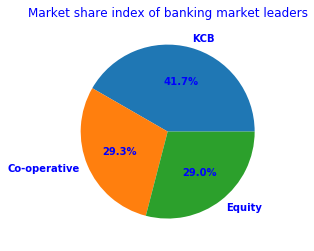

In [3]:
# %%pycodestyle

# We repeat this process as follows:
# 1. Build a table with our percentages
Viz2 = [['KCB', 0.1414], ['Co-operative', 0.0993], ['Equity', 0.0985]]
Viz2 = pd.DataFrame(Viz2)
Viz2.columns = ['Bank', 'MSI']

# 2. We need to visualize our data. I chose a pie chart.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["text.color"] = "blue"

PieSum = Viz2['MSI'].sum()
PieList = [(0.1414/PieSum), (0.0993/PieSum), (0.0985/PieSum)]
plt.title('Market share index of banking market leaders')
plt.pie(PieList, labels=Viz2['Bank'], autopct='%.1f%%')
plt.show()

##What does the average Kenyan look like?
To answer this question, it would be useful to consult the [Kenya National Bureau of Statistics 2019 Economic Survey](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwiJxJLaxPfhAhXuz4UKHQH6D0cQFjAAegQIABAB&url=https%3A%2F%2Fwww.knbs.or.ke%2Fdownload%2Feconomic-survey-2019%2F&usg=AOvVaw2xSFbt8xPunziSXB1wGS83) and the [Kenya National Bureau of Statistics 2018 Economic Survey](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwi6m8iTyffhAhUKExoKHZhkDqUQFjAAegQIABAB&url=https%3A%2F%2Fwww.knbs.or.ke%2Fdownload%2Feconomic-survey-2018%2F&usg=AOvVaw3Mtm3sSOEW5qUlRts_YZro). These reports revealed the following:

1.   They spend ~7800 a month as at 2017
2.   They mostly work in the informal sector (pg. 50 and pg. 308) - however, please note that their definition of 'employed' is someone who has worked for at least 1 hour within 7 days from the date that respondents were interviewed.



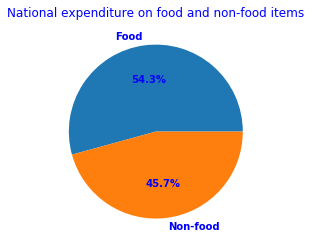

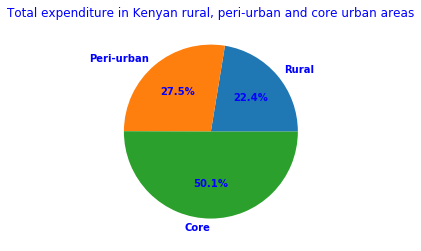

In [4]:
# %%pycodestyle

# First we need to visualize consumption
# 1. Fetch our data
raw = 'https://bit.ly/2WBvizu'
Viz3 = pd.read_csv(raw)

# 2. Visualize it
plt.rcParams["font.weight"] = "bold"
plt.rcParams["text.color"] = "blue"

PieSum = Viz3.iloc[0, 1] + Viz3.iloc[0, 2]
PieList = [(Viz3.iloc[0, 1]/PieSum), (Viz3.iloc[0, 2]/PieSum)]
plt.pie(PieList, labels=['Food', 'Non-food'], autopct='%.1f%%')
plt.title('National expenditure on food and non-food items')
plt.show()

print(' ')
a = Viz3.iloc[1, 3]
b = Viz3.iloc[2, 3]
c = Viz3.iloc[3, 3]
PieSum = a + b + c
PieList = [(a/PieSum), (b/PieSum), (c/PieSum)]
plt.pie(PieList, labels=['Rural', 'Peri-urban', 'Core'], autopct='%.1f%%')
plt.title('Total expenditure in Kenyan rural, peri-urban and core urban areas')
plt.show()

The graph below shows the number of recorded employees in both sectors
for the 2014-2018 period.
Wage employees are represented by the red line
and informal sector employees by the orange line.


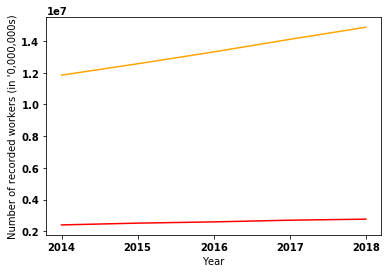

In [5]:
# %%pycodestyle

# Secondly, we visualize employment
# 1. Get the data
Viz4 = pd.read_csv('https://bit.ly/30hSjti')

# 2. Then visualize trends for Wage Employees and Informal Sector workers
year = ['2014', '2015', '2016', '2017', '2018']
WageEmployees = [2401800, 2513700, 2592000, 2699500, 2765100]
a = Viz4['2014'].sum()
b = Viz4['2015'].sum()
c = Viz4['2016'].sum()
d = Viz4['2017'].sum()
e = Viz4['2018'].sum()
InformalEmployees = [a, b, c, d, e]

plt.rcParams["font.weight"] = "bold"
plt.rcParams["text.color"] = "blue"

plt.xlabel('Year')
plt.ylabel("Number of recorded workers (in '0,000,000s)")

plt.plot(year, WageEmployees, color='red')
plt.plot(year, InformalEmployees, color='orange')

print('The graph below shows the number of recorded employees in both sectors')
print('for the 2014-2018 period.')
print('Wage employees are represented by the red line')
print('and informal sector employees by the orange line.')
plt.show()

Informal sector employees are distributed as follows:


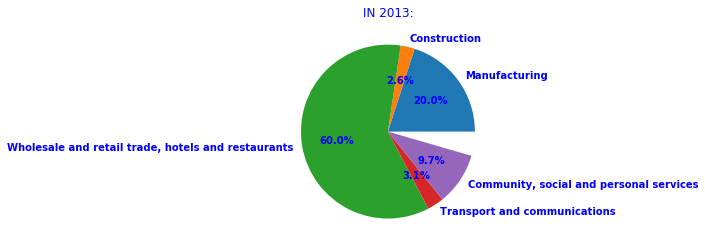

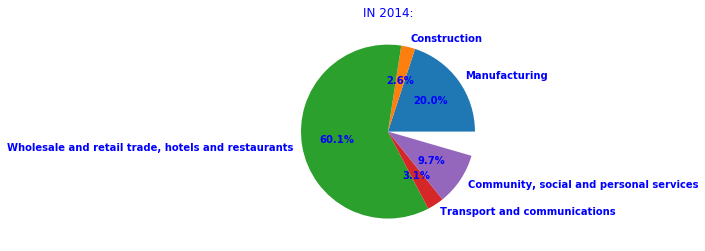

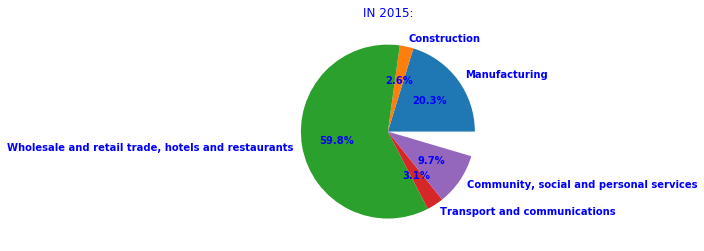

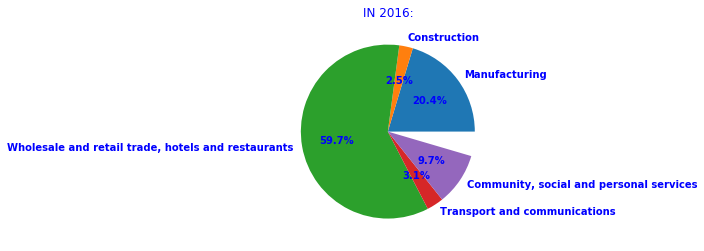

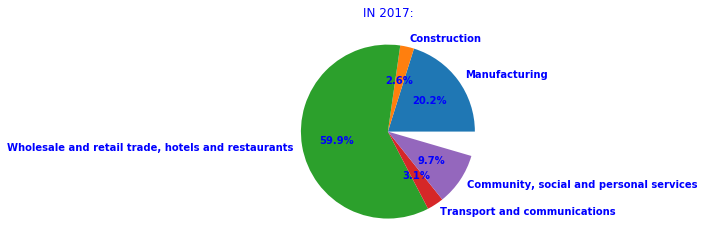

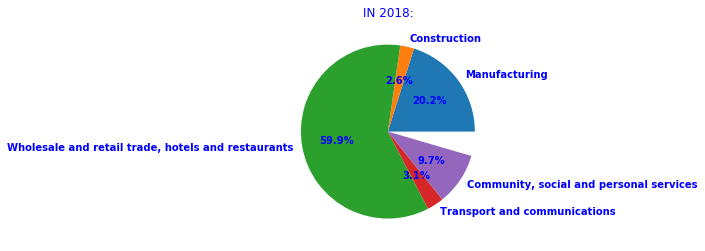

In [6]:
#Now let's breakdown areas of interest within the informal sector
print('Informal sector employees are distributed as follows:')

plt.title('IN 2013:')
plt.pie([(Viz4.iloc[0,1]/Viz4['2013'].sum()), 
         (Viz4.iloc[1,1]/Viz4['2013'].sum()), 
         (Viz4.iloc[2,1]/Viz4['2013'].sum()), 
         (Viz4.iloc[3,1]/Viz4['2013'].sum()), 
         (Viz4.iloc[4,1]/Viz4['2013'].sum())], 
        labels= [(Viz4.iloc[0,0]), 
                 (Viz4.iloc[1,0]), 
                 (Viz4.iloc[2,0]), 
                 (Viz4.iloc[3,0]), 
                 (Viz4.iloc[4,0])], 
        autopct='%.1f%%', 
        textprops={'color': "b"})
plt.show()
print(' ')

plt.title('IN 2014:')
plt.pie([(Viz4.iloc[0,2]/Viz4['2014'].sum()), (Viz4.iloc[1,2]/Viz4['2014'].sum()), (Viz4.iloc[2,2]/Viz4['2014'].sum()), (Viz4.iloc[3,2]/Viz4['2014'].sum()), (Viz4.iloc[4,2]/Viz4['2014'].sum())], labels= [(Viz4.iloc[0,0]), (Viz4.iloc[1,0]), (Viz4.iloc[2,0]), (Viz4.iloc[3,0]), (Viz4.iloc[4,0])], autopct='%.1f%%', textprops={'color': "b"})
plt.show()
print(' ')

plt.title('IN 2015:')
plt.pie([(Viz4.iloc[0,3]/Viz4['2015'].sum()), (Viz4.iloc[1,3]/Viz4['2015'].sum()), (Viz4.iloc[2,3]/Viz4['2015'].sum()), (Viz4.iloc[3,3]/Viz4['2015'].sum()), (Viz4.iloc[4,3]/Viz4['2015'].sum())], labels= [(Viz4.iloc[0,0]), (Viz4.iloc[1,0]), (Viz4.iloc[2,0]), (Viz4.iloc[3,0]), (Viz4.iloc[4,0])], autopct='%.1f%%', textprops={'color': "b"})
plt.show()
print(' ')

plt.title('IN 2016:')
plt.pie([(Viz4.iloc[0,4]/Viz4['2016'].sum()), (Viz4.iloc[1,4]/Viz4['2016'].sum()), (Viz4.iloc[2,4]/Viz4['2016'].sum()), (Viz4.iloc[3,4]/Viz4['2016'].sum()), (Viz4.iloc[4,4]/Viz4['2016'].sum())], labels= [(Viz4.iloc[0,0]), (Viz4.iloc[1,0]), (Viz4.iloc[2,0]), (Viz4.iloc[3,0]), (Viz4.iloc[4,0])], autopct='%.1f%%', textprops={'color': "b"})
plt.show()
print(' ')

plt.title('IN 2017:')
plt.pie([(Viz4.iloc[0,5]/Viz4['2017'].sum()), (Viz4.iloc[1,5]/Viz4['2017'].sum()), (Viz4.iloc[2,5]/Viz4['2017'].sum()), (Viz4.iloc[3,5]/Viz4['2017'].sum()), (Viz4.iloc[4,5]/Viz4['2017'].sum())], labels= [(Viz4.iloc[0,0]), (Viz4.iloc[1,0]), (Viz4.iloc[2,0]), (Viz4.iloc[3,0]), (Viz4.iloc[4,0])], autopct='%.1f%%', textprops={'color': "b"})
plt.show()
print(' ')

plt.title('IN 2018:')
plt.pie([(Viz4.iloc[0,6]/Viz4['2018'].sum()), (Viz4.iloc[1,6]/Viz4['2018'].sum()), (Viz4.iloc[2,6]/Viz4['2018'].sum()), (Viz4.iloc[3,6]/Viz4['2018'].sum()), (Viz4.iloc[4,6]/Viz4['2018'].sum())], labels= [(Viz4.iloc[0,0]), (Viz4.iloc[1,0]), (Viz4.iloc[2,0]), (Viz4.iloc[3,0]), (Viz4.iloc[4,0])], autopct='%.1f%%', textprops={'color': "b"})
plt.show()

Therefore, the trends across different industries in the informal sector are are follows:
The manufacturing industry is represented by blue.
The construction industry is represented by green.
The trade, hotels and restaurants industry is represented by purple.
The transport and communications industry is represented by red.
The community, social and personal services industry is represented by orange.
Other industries are represented by grey.
 


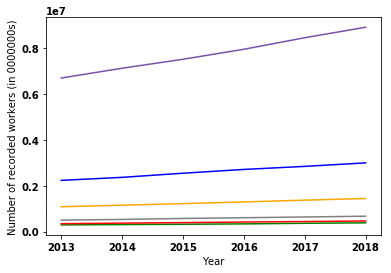

In [7]:
print('Therefore, the trends across different industries in the informal sector are are follows:')
print('The manufacturing industry is represented by blue.')
print('The construction industry is represented by green.')
print('The trade, hotels and restaurants industry is represented by purple.')
print('The transport and communications industry is represented by red.')
print('The community, social and personal services industry is represented by orange.')
print('Other industries are represented by grey.')
print(' ')

year = ['2013', '2014', '2015', '2016', '2017', '2018']
Manufacturing = [Viz4.iloc[0,1], Viz4.iloc[0,2], Viz4.iloc[0,3], Viz4.iloc[0,4], Viz4.iloc[0,5], Viz4.iloc[0,6]]
Construction = [Viz4.iloc[1,1], Viz4.iloc[1,2], Viz4.iloc[1,3], Viz4.iloc[1,4], Viz4.iloc[1,5], Viz4.iloc[1,6]]
THR = [Viz4.iloc[2,1], Viz4.iloc[2,2], Viz4.iloc[2,3], Viz4.iloc[2,4], Viz4.iloc[2,5], Viz4.iloc[2,6]]
TC = [Viz4.iloc[3,1], Viz4.iloc[3,2], Viz4.iloc[3,3], Viz4.iloc[3,4], Viz4.iloc[3,5], Viz4.iloc[3,6]]
CSP = [Viz4.iloc[4,1], Viz4.iloc[4,2], Viz4.iloc[4,3], Viz4.iloc[4,4], Viz4.iloc[4,5], Viz4.iloc[4,6]]
Other = [Viz4.iloc[5,1], Viz4.iloc[5,2], Viz4.iloc[5,3], Viz4.iloc[5,4], Viz4.iloc[5,5], Viz4.iloc[5,6]]

plt.plot(year, Manufacturing, color = 'blue')
plt.plot(year, Construction, color = 'green')
plt.plot(year, THR, color = '#7851a9')
plt.plot(year, TC, color = 'red')
plt.plot(year, CSP, color = 'orange')
plt.plot(year, Other, color = 'grey')
plt.xlabel('Year')
plt.ylabel('Number of recorded workers (in ''0000000s)')
plt.show()

Therefore, to summarize our findings, the informal sector is clearly the larger and more vibrant sector of the economy and large commercial banks dominate the banking sector.

#Problem statement
            "The informal sector is characterized by small scale activities, easy entry and exit due to fewer regulations, skills gained from vocational institutions, less capital investment, limited job security and also self-employment. This sector however excludes illegal activities such as drug trafficking and others."

                                                 -Economic Survey 2018



I aim to conduct sentiment analysis on Facebook posts uploaded by Kenya's 3 largest banks - 990 posts per bank were sampled with the aim to conduct exploratory data analysis and build an algorithm that
can:

1.   identify customers from the informal sector
2.   Classify these informal customers' sentiments


In [8]:
#%%pycodestyle

Equity = pd.read_csv('https://raw.githubusercontent.com/CeeThinwa/DataScienceLearningDatasets/master/page_160566687422299_2019_04_20_18_08_01_comments.csv?token=AKYHWCSMF4VLAQ3C7YXIB724XY3VG')
Co_op = pd.read_csv('https://raw.githubusercontent.com/CeeThinwa/DataScienceLearningDatasets/master/page_167665299973840_2019_04_20_17_16_12_comments.csv?token=AKYHWCUGWAJIYVN2EOK4TVS4XY36E')
KCB = pd.read_csv('https://raw.githubusercontent.com/CeeThinwa/DataScienceLearningDatasets/master/page_177618962271930_2019_04_20_18_44_34_comments.csv?token=AKYHWCSBTO5VMSWXT7PJ2EC4XY4CM')

#Add a column that identifies which bank page the user is on
Equity['Bank'] = 'Equity'
KCB['Bank'] = 'KCB'
Co_op['Bank'] = 'Co-op'

print(Equity.shape)
print(KCB.shape)
print(Co_op.shape)

Co_op.head(5)

(41454, 14)
(68117, 14)
(70488, 14)


,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,attachment_type,attachment_url,Bank
0,0_0,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,Travelling this Easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618521441554868,pageowner,1,"Hallo David, we have one month and 3 months re...",2019-04-20T07:31:46+0000,0,NaN,NaN,Co-op
1,0_1,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,Travelling this Easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618538161553196,da39a3ee5e6b4b0d3255bfef95601890afd80709,1,Co-op Bank Kenya do not have other loan produc...,2019-04-20T07:42:19+0000,0,NaN,NaN,Co-op
2,0_2,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,Travelling this Easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618544508219228,pageowner,1,Yes we have personal loan which you can apply ...,2019-04-20T07:46:28+0000,0,NaN,NaN,Co-op
3,0_3,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,Travelling this Easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618556491551363,da39a3ee5e6b4b0d3255bfef95601890afd80709,1,How to I pay the salary loan via mobile banking,2019-04-20T07:53:56+0000,0,NaN,NaN,Co-op
4,0_4,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,Travelling this Easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618563248217354,pageowner,1,Please check inbox for our response. ^FK,2019-04-20T07:57:34+0000,0,NaN,NaN,Co-op


# My Solution
## Exploratory Data Analysis
When conducting text analysis, it is often recommended that all words should be lowercase for ease of analysis. Therefore, before we begin our EDA(Exploratory Data Analysis), we should  probably do that.

In [9]:
# Let's print out the initial shapes of the 3 bank datasets:
print('Before data clean-up, below were the shapes of the 3 bank datasets:')
print('Co-op had a shape of ' + str(Co_op.shape))
print('KCB had a shape of ' + str(KCB.shape))
print('and')
print('Equity had a shape of ' + str(Equity.shape))

# First, we drop unnecessary columns or columns with too many NaN values
Co_op = Co_op.drop(labels = 'attachment_type', axis = 1)
Co_op = Co_op.drop(labels = 'attachment_url', axis = 1)

KCB = KCB.drop(labels = 'attachment_type', axis = 1)
KCB = KCB.drop(labels = 'attachment_url', axis = 1)

Equity = Equity.drop(labels = 'attachment_type', axis = 1)
Equity = Equity.drop(labels = 'attachment_url', axis = 1)

# and rows with NaN values
Co_op = Co_op.dropna(axis=0, how='any')
KCB = KCB.dropna(axis=0, how='any')
Equity = Equity.dropna(axis=0, how='any')

# All our comments should then be lowercase as follows:
Co_op['post_text'] = Co_op['post_text'].str.lower()
Co_op['comment_message'] = Co_op['comment_message'].str.lower()

# Finally, we have clean output!
# Let's print out the initial shapes of the 3 bank datasets:
print('-----------------------------------------------------------------------')
print('After data clean-up, below are the shapes of the 3 bank datasets:')
print('Co-op has a shape of ' + str(Co_op.shape))
print('KCB has a shape of ' + str(KCB.shape))
print('and')
print('Equity has a shape of ' + str(Equity.shape))
print(' ')

Before data clean-up, below were the shapes of the 3 bank datasets:
Co-op had a shape of (70488, 14)
KCB had a shape of (68117, 14)
and
Equity had a shape of (41454, 14)
-----------------------------------------------------------------------
After data clean-up, below are the shapes of the 3 bank datasets:
Co-op has a shape of (69718, 12)
KCB has a shape of (67162, 12)
and
Equity has a shape of (41113, 12)
 


As seen from our output, we lost 770 Co-op comments, 955 KCB comments and 341 Equity comments.

---


Next, we have to compare different attributes across the different banks. To identify informal bank customers, we need to calculate the following:
1.   The number of replies that each bank has received; higher values indicate higher engagement and vice-versa.
2.   The most frequent words in the bank comments to identify words that would indicate that their customer base are in the informal sector
3.   The highest engagement per post and per user for each bank to identify the most popular post and determine if that post is reflective of the informal sector to prequalify that particular bank as having a substantial informal customer base.


###1. Number of replies
In this case, we created a dataframe that could identify the number of replies per bank;  it was found that KCB Bank had the highest number of replies compared to the other 2 banks - this could indicate that even though it has fewer comments than Co-op Bank, it has more engagement because many replies could signal that conversations are being heard.

In [10]:
# Firstly, we identify the number of comments that are replies and those 
# that are not for the various banks by creating grouped tables of our findings
Co_opGroup = Co_op.groupby(['is_reply'])
Co_opGroup = pd.DataFrame(Co_opGroup.size().reset_index(name = 'Co_opCount'))

KCBGroup = KCB.groupby(['is_reply'])
KCBGroup = pd.DataFrame(KCBGroup.size().reset_index(name = 'KCBCount'))

EquityGroup = Equity.groupby(['is_reply'])
EquityGroup = pd.DataFrame(EquityGroup.size().reset_index(name = 'EquityCount'))

OurTable = Co_opGroup
OurTable['Co_opCount'] = Co_opGroup['Co_opCount']
OurTable['KCBCount'] = KCBGroup['KCBCount']
OurTable['EquityCount'] = EquityGroup['EquityCount']

OurTable.head()

,is_reply,Co_opCount,KCBCount,EquityCount
0,0,30755,25457,13703
1,1,38963,41705,27410


###2. Most frequent words in the comments
From the table above, we can see that the bulk of the comments are replies across all 3 banks. But what happens when we look for the most common word in each comment?

In [0]:
# We can tokenize Co-op words for practice as follows:
# c_tokens = Co_op.apply(lambda row:
  #                      nltk.word_tokenize(row['comment_message']),
  #                      axis=1)

In [12]:
# I used the FreqDist function to do this as shown:
Co_op_Fdist = nltk.FreqDist(Co_op['comment_message'])
KCB_Fdist = nltk.FreqDist(KCB['comment_message'])
Equity_Fdist = nltk.FreqDist(Equity['comment_message'])

# I then picked the 50 most common expressions in each as the 3 datasets as shown:
Co_op_Mode = Co_op_Fdist.most_common(50)
KCB_Mode = KCB_Fdist.most_common(50)
Equity_Mode = Equity_Fdist.most_common(50)

# And presented my findings below:
print("Co-op Bank's top 50 most common expressions were:")
print(Co_op_Mode)
print(' ')
print("KCB Bank's top 50 most common expressions were:")
print(KCB_Mode)
print(' ')
print("Equity Bank's top 50 most common expressions were:")
print(Equity_Mode)
print('-----------------------------------------------------------------------')

Co-op Bank's top 50 most common expressions were:
[('?. ^fk', 668), ('?^wn', 450), ('thanks', 286), ('?. ^bk', 203), ('?. ^jm', 202), ('?. ^bm', 192), ('?^ck', 169), ('?  ^pk', 164), ('amen', 163), ('chemistry', 155), ('thanks for sharing. ^bm', 152), ('thank you', 146), ('???. ^fk', 145), ('??? ^fk', 145), ('geography', 143), ('6', 138), ('2100', 132), ('1000', 124), ('correct ^rn', 123), ('??. ^bm', 122), ('24', 121), ('2', 118), ('ok', 114), ('biology', 114), ('?.^ca', 110), ('physics', 109), ('?^mw', 108), ('???^wn', 107), ('0', 90), ('true', 89), ('thank you for sharing.^jm', 86), ('?.^gb', 84), ('2000', 82), ('??. ^fk', 76), ('1k', 70), ('zero', 68), ('2k', 68), ('?.^wm', 65), ('you are most welcome. thank you. ^kj', 65), ('?.^mbm', 59), ('smokie', 58), ('? ^wn', 56), ('?. ^ja', 55), ('mutura', 55), ('yes', 54), ('4', 52), ('?^jm', 51), ('none', 49), ('??? ^bm', 48), ('?. ^pk', 47)]
 
KCB Bank's top 50 most common expressions were:
[('?', 1814), ('??', 996), ('???', 312), ('Hi, k

The output above is quite interesting.
> For starters, Co-op customers appear to be hungry informal workers! Kenyan sheng words for food e.g. "mutura" (African sausage) and "smokie"(processed sausage) ppear in our 50 most frequent expressions for Co-op.

> KCB customers, on the other hand, appear loan hungry, with some defaulting on their small loans and appearing to try and have their names removed from a Credit Reference Bureau list so that they can borrow again. [Informal sector workers have heavily adopted mobile money](https://www.the-star.co.ke/opinion/columnists/2019-04-01-making-life-easier-for-borrowers/) but a large segment of the Kenyan population are [still financially illiterate](https://www.businessdailyafrica.com/datahub/Alarm-as-easy-digital-loans-yoke-more-Kenyans-to-debt/3815418-5063014-en2bp7z/index.html) when it comes to seeking and servicing loans.

>Equity staff on the other hand are rolling out the red carpet for their customer - "Karibu" was used quite a lot; the expression is used by both formal and informal sector workers. Customers are also appreciative of this treatment.

###3. Most comments per post and per user
Another key concern that we must address is this: which posts across the 3 banks had the highest number of comments per post and per user?

In [0]:
# To get this, we will have a grouped table for each of the banks
# Grouping per post id
Co_opGroup = Co_op.groupby(['post_id'])
Co_opGroup1 = pd.DataFrame(Co_opGroup.size().reset_index(name='Co_opPostCount'))

KCBGroup = KCB.groupby(['post_id'])
KCBGroup1 = pd.DataFrame(KCBGroup.size().reset_index(name='KCBPostCount'))

EquityGroup = Equity.groupby(['post_id'])
EquityGroup1 = pd.DataFrame(EquityGroup.size().reset_index(name='EquityPostCount'))

# Then per user id
Co_opGroup = Co_op.groupby(['comment_by'])
Co_opGroup2 = pd.DataFrame(Co_opGroup.size().reset_index(name = 'Co_opUserCount'))

KCBGroup = KCB.groupby(['comment_by'])
KCBGroup2 = pd.DataFrame(KCBGroup.size().reset_index(name = 'KCBUserCount'))

EquityGroup = Equity.groupby(['comment_by'])
EquityGroup2 = pd.DataFrame(EquityGroup.size().reset_index(name = 'EquityUserCount'))

The graph below shows the number of comments per post
Co-op is represented by green,
KCB by blue
and
Equity by orange.


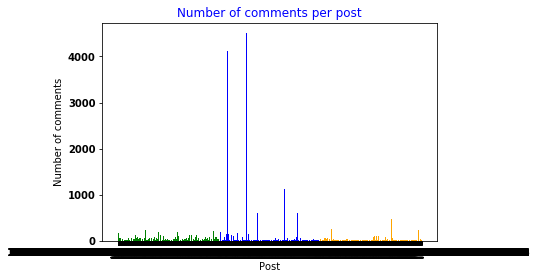

In [17]:
# Now we can visualize!
# To make a bar graph of post id counts, we do the following:
plt.title('Number of comments per post')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["text.color"] = "blue"

plt.xlabel('Post')
plt.ylabel('Number of comments')

plt.bar(Co_opGroup1['post_id'], Co_opGroup1['Co_opPostCount'], color='green')
plt.bar(KCBGroup1['post_id'], KCBGroup1['KCBPostCount'], color='blue')
plt.bar(EquityGroup1['post_id'], EquityGroup1['EquityPostCount'], color='orange')

print('The graph below shows the number of comments per post')
print('Co-op is represented by green,')
print('KCB by blue')
print('and')
print('Equity by orange.')
plt.show()

In [27]:
# I made a bar graph of user id counts by found that a table was the best way
# to visualize data for all 3 banks
print('Co-op Bank user id count data has a shape of ' + str(Co_opGroup2.shape))
print(' ')
Co_opGroup2.head(10)

Co-op Bank user id count data has a shape of (9, 2)
 


,comment_by,Co_opUserCount
0,02a90a569dd3e3a4994fed19c442b4b93a2aa742,14
1,2c4f366322bbb96ea07fb69bf0f6223f382a9a6d,1
2,35c5c98233ed845211787ce323419956b746cef4,6
3,364b38ac4312a00ec841d35b133da63ad582b02c,2
4,bb24b6ed1f9d0167495b56a073f89fdb0aa1c184,1
5,da0f7e0faecc658b1a594e055b4fa0813455894c,2
6,da39a3ee5e6b4b0d3255bfef95601890afd80709,42826
7,e25ae7d8f012ce95ed9bdee93b62768bfa3019d7,1
8,pageowner,26865


In [28]:
print('KCB Bank user id count data has a shape of ' + str(KCBGroup2.shape))
print(' ')
KCBGroup2.head(15)

KCB Bank user id count data has a shape of (13, 2)
 


,comment_by,KCBUserCount
0,06defef94d761bc03dc61e7ed967ba52b2cee292,4
1,073366d65811ace7ceb4a326efef9097ee46416b,1
2,346256224d3885c2ebe8a13313bc81301286750c,8
3,59577878e8039a025143ce4e7880676a1be2e809,2
4,6aa862ed7bf8b6cd422ae6a5f076d2d58229371c,1
5,7c6b41f394e9263960bd3c6956f9a162f0b3926e,1
6,a9e9b2ead748b093dd671b9128736c6090aa8a22,1
7,b31e2051b0d3e7499963f1ee46c832c3b07c53e2,3
8,b82d96bbf286b8c20434e2bb31801673108f9f3f,1
9,c5d98f749f3801b779c30748bced70ae046c5d28,2


In [30]:
print('Equity Bank user id count data has a shape of ' + str(EquityGroup2.shape))
print(' ')
EquityGroup2.head(10)

Equity Bank user id count data has a shape of (6, 2)
 


,comment_by,EquityUserCount
0,346256224d3885c2ebe8a13313bc81301286750c,5
1,69b4296fb78778d63f0b681ba42e818970636b5d,1
2,9ef7ad63baeab28b77148d56a0fd3c1a67330965,1
3,b31e2051b0d3e7499963f1ee46c832c3b07c53e2,2
4,da39a3ee5e6b4b0d3255bfef95601890afd80709,22455
5,pageowner,18649


Who are these mystery users, and what are they saying? To answer this question, we need to create filtered datasets.

> We start with mystery user "da39a3ee5e6b4b0d3255bfef95601890afd80709".



In [40]:
# First, let's examine the mystery commenter who is busy commenting on all 3 bank pages
# Co-op filtered comments are:
FilteredUser1 = Co_op[Co_op['comment_by'].str.contains("da39a3ee5e6b4b0d3255bfef95601890afd80709")]
FilteredUser1.head(5)

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,Bank
1,0_1,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618538161553196,da39a3ee5e6b4b0d3255bfef95601890afd80709,1,co-op bank kenya do not have other loan produc...,2019-04-20T07:42:19+0000,0,Co-op
3,0_3,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618556491551363,da39a3ee5e6b4b0d3255bfef95601890afd80709,1,how to i pay the salary loan via mobile banking,2019-04-20T07:53:56+0000,0,Co-op
5,0_5,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618487368224942,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,what is the repayment period for the salary loan?,2019-04-20T07:09:50+0000,0,Co-op
7,0_7,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618413194899026,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,@ co-op bank kenya i�m tired of you spamming m...,2019-04-20T06:22:49+0000,0,Co-op
9,0_9,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618481434892202,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,am trying to use coop bank card to boost my fa...,2019-04-20T07:05:51+0000,0,Co-op


In [41]:
# KCB filtered comments are:
FilteredUser1 = KCB[KCB['comment_by'].str.contains("da39a3ee5e6b4b0d3255bfef95601890afd80709")]
FilteredUser1.head(5)

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,Bank
2,0_2,177618962271930_2940648462635619,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,hy kcb iam a member of kcbmobigrow pls i need ...,2019-04-20T14:05:31+0000,2940648462635619_2940828969284235,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,thenks,2019-04-20T15:57:55+0000,0,KCB
3,1_0,177618962271930_2940644035969395,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,How can I get it,2019-04-20T14:02:42+0000,2940644035969395_2940788305954968,da39a3ee5e6b4b0d3255bfef95601890afd80709,1,Pepea pin,2019-04-20T15:30:40+0000,0,KCB
6,2_0,177618962271930_2940517722648693,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,Hawa mnawajua?,2019-04-20T12:42:56+0000,2940517722648693_2940533472647118,da39a3ee5e6b4b0d3255bfef95601890afd80709,1,KCB Group I didn't call them back. I thought b...,2019-04-20T12:53:22+0000,0,KCB
11,3_2,177618962271930_2940255796008219,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,Good afternoon. Your KCB Bank Kisumu Advantag...,2019-04-20T09:16:05+0000,2940255796008219_2940268892673576,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Just tell your guys to speed up and serve cust...,2019-04-20T09:26:59+0000,0,KCB
14,4_2,177618962271930_2940157922684673,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,KCB mpesa is afake since last year I ve been r...,2019-04-20T07:49:49+0000,2940157922684673_2940665862633879,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,"Same case with me,0721781508",2019-04-20T14:17:20+0000,0,KCB


In [53]:
# Equity filtered comments are:
FilteredUser1 = Equity[Equity['comment_by'].str.contains("da39a3ee5e6b4b0d3255bfef95601890afd80709")]
FilteredUser1.head(10)

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,Bank
3,2_2,160566687422299_1722813137864305,232ef22f027506bc8032053c1101c3e6d73060ed,MAMBO VP EQUITY BANK MNAESHA NIPEA LOAN?,2019-04-20T08:27:32+0000,1722813137864305_1722876524524633,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,sina unaweza fungua na uombe loan,2019-04-20T10:16:55+0000,0,Equity
6,3_2,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722954857850133,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Happy Easter,2019-04-20T12:29:59+0000,0,Equity
8,3_4,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722925667853052,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,So just because I defaulted payment of a salar...,2019-04-20T11:37:20+0000,0,Equity
10,3_6,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722913231187629,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,"I took an easyloan through my account, which h...",2019-04-20T11:17:30+0000,0,Equity
12,3_8,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722788501200102,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Happy Easter,2019-04-20T07:46:07+0000,0,Equity
14,3_10,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722788424533443,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Gotta,2019-04-20T07:45:57+0000,0,Equity
16,3_12,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722905307855088,da39a3ee5e6b4b0d3255bfef95601890afd80709,1,Equity Bank Kenya why should I talk to you guy...,2019-04-20T11:03:04+0000,0,Equity
17,3_13,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722803277865291,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Buda Lala wacha Kusumbua watu Easter?,2019-04-20T08:13:48+0000,1,Equity
19,3_15,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722788461200106,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,"Si I thought office za equity zimefungwa,ama w...",2019-04-20T07:46:02+0000,1,Equity
21,3_17,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722816114530674,da39a3ee5e6b4b0d3255bfef95601890afd80709,0,Is your Airport branch open for business today?,2019-04-20T08:32:08+0000,0,Equity


The comments above look very spammy; however, the language used would be a mixture of English, Kiswahili and Sheng, used by people in the informal sector.


---

Now we can examine comments put out by "pageowner" across the different pages:

In [43]:
# Let us investigate "pageowner"
# Co-op filtered comments are:
FilteredUser2 = Co_op[Co_op['comment_by'].str.contains("pageowner")]
FilteredUser2.head(5)

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,Bank
0,0_0,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618521441554868,pageowner,1,"hallo david, we have one month and 3 months re...",2019-04-20T07:31:46+0000,0,Co-op
2,0_2,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618544508219228,pageowner,1,yes we have personal loan which you can apply ...,2019-04-20T07:46:28+0000,0,Co-op
4,0_4,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618563248217354,pageowner,1,please check inbox for our response. ^fk,2019-04-20T07:57:34+0000,0,Co-op
6,0_6,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618457118227967,pageowner,1,hallo wanjiru. we have been in touch . please ...,2019-04-20T06:49:56+0000,0,Co-op
8,0_8,167665299973840_2618333928240286,0ddb80635cd72093adc37322c7cb53f97b94ee8f,travelling this easter season ama uko mtaa?,2019-04-20T05:30:31+0000,2618333928240286_2618522661554746,pageowner,1,we have responded on inbox fortune. ^fk,2019-04-20T07:32:32+0000,0,Co-op


In [44]:
# KCB filtered comments are:
FilteredUser2 = KCB[KCB['comment_by'].str.contains("pageowner")]
FilteredUser2.head(5)

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,Bank
0,0_0,177618962271930_2940648462635619,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,hy kcb iam a member of kcbmobigrow pls i need ...,2019-04-20T14:05:31+0000,2940648462635619_2940693485964450,pageowner,0,"Hello, please visit us at the branch we will b...",2019-04-20T14:34:37+0000,0,KCB
1,0_1,177618962271930_2940648462635619,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,hy kcb iam a member of kcbmobigrow pls i need ...,2019-04-20T14:05:31+0000,2940648462635619_2940831569283975,pageowner,1,?,2019-04-20T15:59:32+0000,0,KCB
4,1_1,177618962271930_2940644035969395,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,How can I get it,2019-04-20T14:02:42+0000,2940644035969395_2940790792621386,pageowner,1,Please visit us at the branch we will be glad ...,2019-04-20T15:32:25+0000,0,KCB
5,1_2,177618962271930_2940644035969395,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,How can I get it,2019-04-20T14:02:42+0000,2940644035969395_2940690262631439,pageowner,0,"Hello, what service are you referring to .^MK",2019-04-20T14:32:27+0000,1,KCB
7,2_1,177618962271930_2940517722648693,4ccdd7de2af6b26d3aa85ca11d0612cab5d093fe,Hawa mnawajua?,2019-04-20T12:42:56+0000,2940517722648693_2940554462645019,pageowner,1,Thank you for sharing .Please send that number...,2019-04-20T13:05:08+0000,0,KCB


In [45]:
# Equity filtered comments are:
FilteredUser2 = Equity[Equity['comment_by'].str.contains("pageowner")]
FilteredUser2.head(5)

,position,post_id,post_by,post_text,post_published,comment_id,comment_by,is_reply,comment_message,comment_published,comment_like_count,Bank
0,1_0,160566687422299_1722829227862696,232ef22f027506bc8032053c1101c3e6d73060ed,can some help me register online bankig it kee...,2019-04-20T08:57:28+0000,1722829227862696_1722985404513745,pageowner,0,"Hello Karanja, trust you are well. The e-mail ...",2019-04-20T13:26:09+0000,0,Equity
1,2_0,160566687422299_1722813137864305,232ef22f027506bc8032053c1101c3e6d73060ed,MAMBO VP EQUITY BANK MNAESHA NIPEA LOAN?,2019-04-20T08:27:32+0000,1722813137864305_1722869884525297,pageowner,0,"Jambo Ezira, unaweza kuomba Loan na sisi kulin...",2019-04-20T10:03:49+0000,0,Equity
2,2_1,160566687422299_1722813137864305,232ef22f027506bc8032053c1101c3e6d73060ed,MAMBO VP EQUITY BANK MNAESHA NIPEA LOAN?,2019-04-20T08:27:32+0000,1722813137864305_1722980404514245,pageowner,1,"Ukishafungua akaunti, utaitumia kwa muda wa mi...",2019-04-20T13:18:37+0000,0,Equity
4,3_0,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1722907151188237,pageowner,0,Happy Easter Rose.,2019-04-20T11:07:00+0000,0,Equity
5,3_1,160566687422299_1721286358016983,b45d16877f65f7dad2bc0fc4f259416797fd350e,Huyu ni ule msee ata attend bash zote and yet ...,2019-04-20T07:00:02+0000,1721286358016983_1723003047845314,pageowner,1,Happy Easter Joni.,2019-04-20T13:49:38+0000,0,Equity


We can safely say that pageowner appears to be the Facebook page admin on each of the banks' Facebook pages.

#In conclusion
Based on the huge imbalance in terms of users, this data will not be used for further analysis or machine learning; however, this report is a useful first step in understanding how the informal sector interacts with banking in general.